### See Python Data Science Handbook
https://jakevdp.github.io/PythonDataScienceHandbook/

import graphic libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

read csv data

In [2]:
import pandas as pd
planes = pd.read_csv('../data/planes.csv')
flights = pd.read_csv('../data/flights.csv')

In [3]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [4]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [ ]:
sns.histplot?

<AxesSubplot:xlabel='seats', ylabel='Count'>

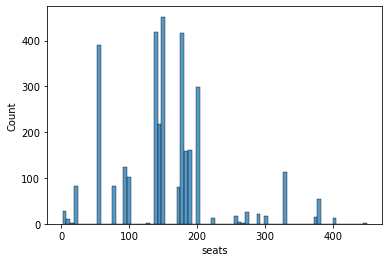

In [6]:
sns.histplot(data=planes, x='seats')

<AxesSubplot:xlabel='engines', ylabel='Count'>

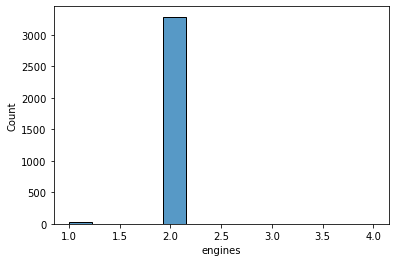

In [7]:
sns.histplot(data=planes, x='engines')

<AxesSubplot:xlabel='seats', ylabel='Count'>

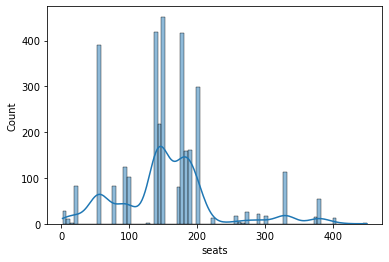

In [8]:
sns.histplot(data=planes, x='seats', kde=True)

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

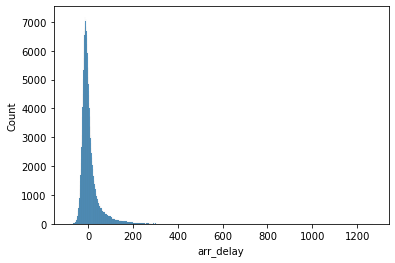

In [9]:
sns.histplot(data=flights, x='arr_delay')

<AxesSubplot:xlabel='seats'>

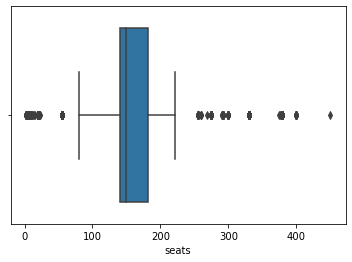

In [10]:
sns.boxplot(data=planes, x='seats')

<AxesSubplot:xlabel='seats'>

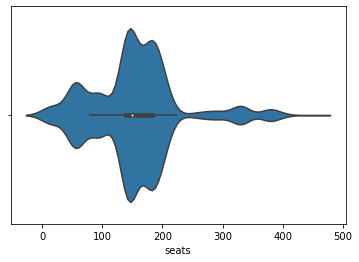

In [11]:
sns.violinplot(data=planes, x='seats')

<AxesSubplot:xlabel='seats', ylabel='year'>

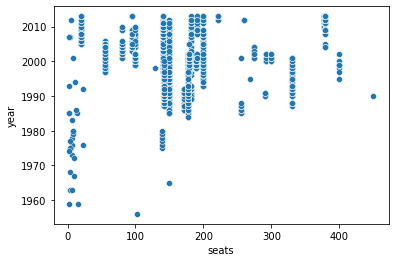

In [12]:
sns.scatterplot(data=planes, x='seats', y='year')

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

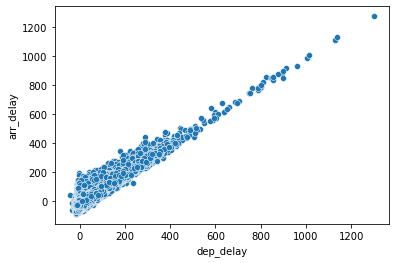

In [13]:
sns.scatterplot(data=flights, x='dep_delay', y='arr_delay')

<AxesSubplot:xlabel='seats', ylabel='year'>

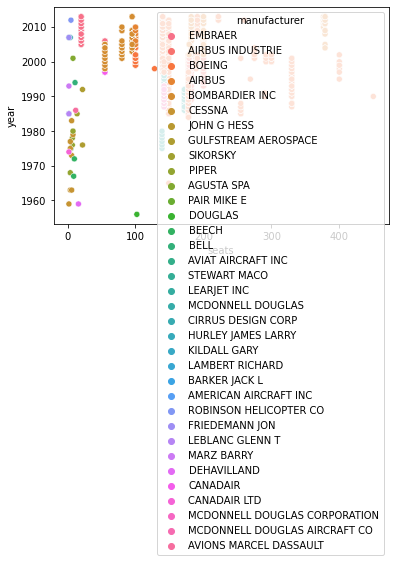

In [14]:
sns.scatterplot(data=planes, x='seats', y='year', hue = 'manufacturer')

<AxesSubplot:xlabel='seats', ylabel='year'>

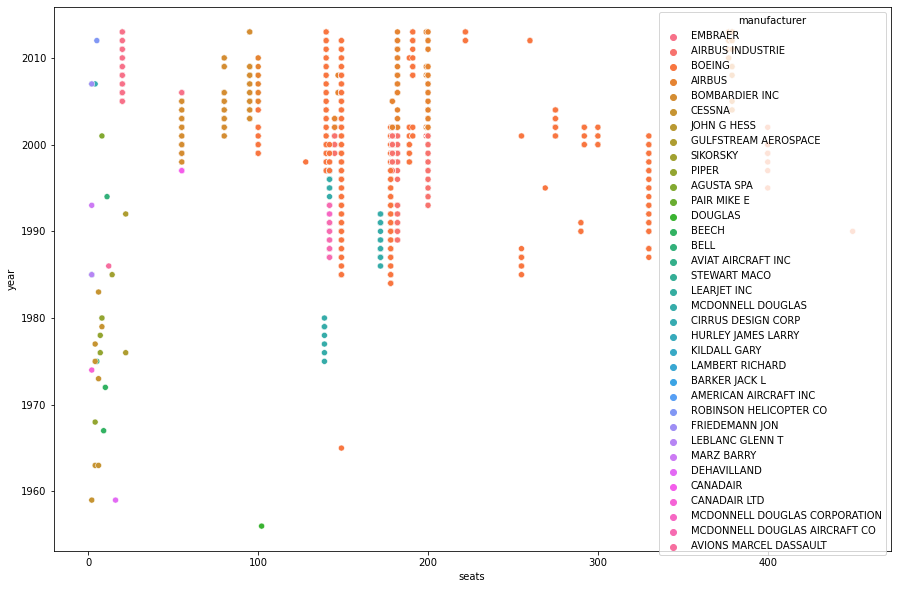

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=planes, x='seats', y='year', hue = 'manufacturer')

<AxesSubplot:xlabel='year', ylabel='seats'>

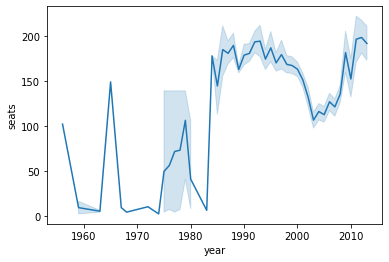

In [16]:
sns.lineplot(data=planes, x='year', y='seats')

<AxesSubplot:xlabel='year', ylabel='seats'>

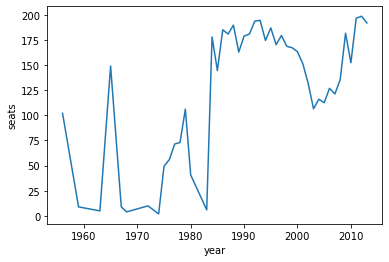

In [19]:
#put an aggregate in the chart
aggregated = planes.groupby('year', as_index=False).agg({'seats': 'mean'})
sns.lineplot(data=aggregated, x='year', y='seats')

<AxesSubplot:xlabel='origin', ylabel='tailnum'>

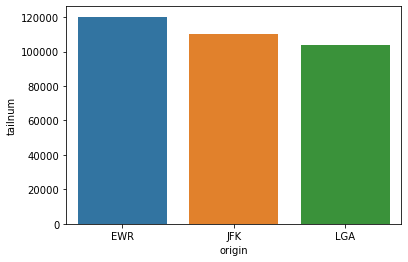

In [22]:
flight_counts = flights.groupby('origin', as_index=False).agg({'tailnum': 'count'})
sns.barplot(data=flight_counts, x='origin', y='tailnum')

<AxesSubplot:xlabel='origin', ylabel='n_flights'>

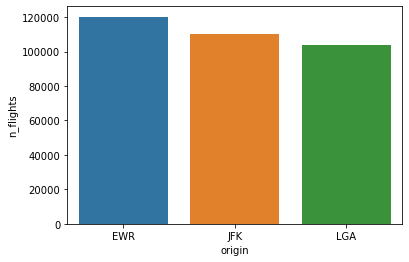

In [28]:
#rename the columns
flight_counts_rename= flight_counts.rename(columns={'tailnum': 'n_flights'})
flight_counts_rename
sns.barplot(data=flight_counts_rename, x='origin', y='n_flights')

In [35]:
# This time, get flights by origin and carrier
flight_counts = flights.groupby(['origin', 'carrier'], as_index=False)['flight'].count()
flight_counts = flight_counts.rename(columns={'flight': 'n_flights'})
# For simplicity, let's narrow down to just a few carriers.
flight_counts = flight_counts.loc[flight_counts['carrier'].isin(['AA', 'B6', '9E'])]
flight_counts

,origin,carrier,n_flights
0,EWR,9E,1268
1,EWR,AA,3487
3,EWR,B6,6557
12,JFK,9E,14651
13,JFK,AA,13783
14,JFK,B6,42076
22,LGA,9E,2541
23,LGA,AA,15459
24,LGA,B6,6002


<AxesSubplot:xlabel='origin', ylabel='n_flights'>

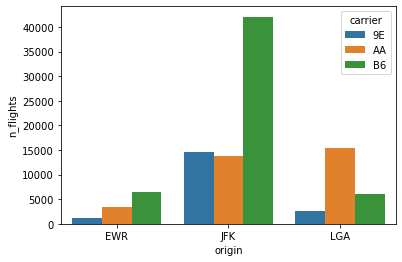

In [33]:
sns.barplot(data=flight_counts, x='origin', y='n_flights', hue='carrier')

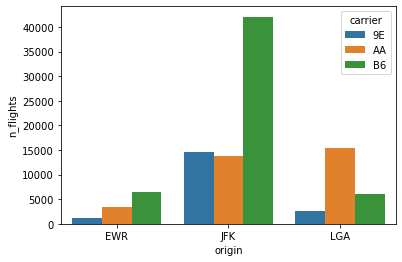

In [34]:
#add a semicolon at the end to suppress the AxesSubplot line
sns.barplot(data=flight_counts, x='origin', y='n_flights', hue='carrier');

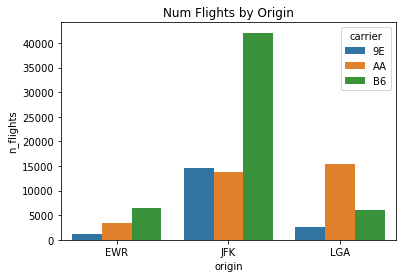

In [38]:
sns.barplot(
    data=flight_counts, 
    x='origin', 
    y='n_flights', 
    hue='carrier'
).set(
    title='Num Flights by Origin'
);

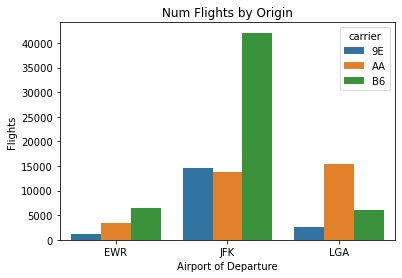

In [40]:
sns.barplot(
    data=flight_counts, 
    x='origin', 
    y='n_flights', 
    hue='carrier'
).set(
    title='Num Flights by Origin',
    xlabel='Airport of Departure',
    ylabel='Flights'
);